In [545]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [546]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [547]:
X_train.shape

(60000, 28, 28)

In [548]:
X_test.shape

(10000, 28, 28)

In [549]:
single_image= X_train[0]

In [550]:
single_image.shape

(28, 28)

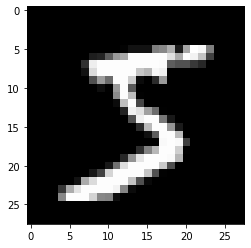

In [551]:
plt.imshow(single_image,cmap='gray')

In [552]:
y_train.shape

(60000,)

In [553]:
X_train.min()

0

In [554]:
X_train.max()

255

In [555]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [556]:
X_train_scaled.min()

0.0

In [557]:
X_train_scaled.max()

1.0

In [558]:
y_train[0]

5

In [559]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [560]:
type(y_train_onehot)

numpy.ndarray

In [561]:
y_train_onehot.shape

(60000, 10)

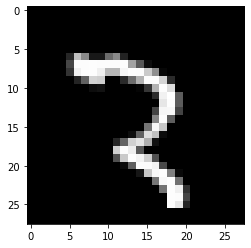

In [562]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [563]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [564]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [565]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='tanh')) 
model.add(layers.Dense(10, activation ='softmax'))



In [566]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d_13 (Avera  (None, 14, 14, 32)       0         
 gePooling2D)                                                    
                                                                 
 flatten_13 (Flatten)        (None, 6272)              0         
                                                                 
 dense_26 (Dense)            (None, 32)                200736    
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
_______________________________________________

In [567]:
# Choose the appropriate parameters
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [568]:
model.fit(X_train_scaled ,y_train_onehot, epochs=7,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/7
938/938 [==============================] - 4s 4ms/step - loss: 0.2668 - accuracy: 0.9292 - val_loss: 0.1021 - val_accuracy: 0.9721
Epoch 2/7
938/938 [==============================] - 4s 4ms/step - loss: 0.0850 - accuracy: 0.9766 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 3/7
938/938 [==============================] - 4s 4ms/step - loss: 0.0577 - accuracy: 0.9837 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 4/7
938/938 [==============================] - 3s 4ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0564 - val_accuracy: 0.9820
Epoch 5/7
938/938 [==============================] - 3s 4ms/step - loss: 0.0359 - accuracy: 0.9897 - val_loss: 0.0545 - val_accuracy: 0.9828
Epoch 6/7
938/938 [==============================] - 3s 4ms/step - loss: 0.0281 - accuracy: 0.9920 - val_loss: 0.0521 - val_accuracy: 0.9838
Epoch 7/7
938/938 [==============================] - 3s 4ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.0484 - val_accuracy: 0.9852


In [569]:
metrics = pd.DataFrame(model.history.history)

In [570]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.266765,0.929200,0.102068,0.9721
1,0.085050,0.976583,0.069802,0.9780
2,0.057662,0.983733,0.063667,0.9801
3,0.044337,0.986950,0.056419,0.9820
4,0.035932,0.989733,0.054492,0.9828


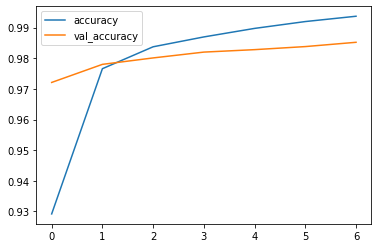

In [571]:
metrics[['accuracy','val_accuracy']].plot()

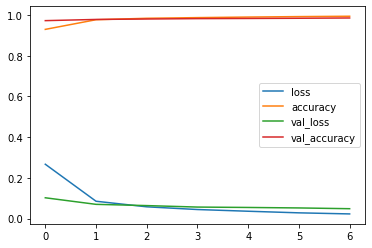

In [572]:
metrics.plot()

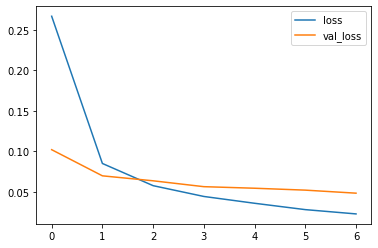

In [573]:
metrics[['loss','val_loss']].plot()

In [574]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [575]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 970    0    1    0    1    4    2    1    1    0]
 [   0 1128    2    1    0    0    4    0    0    0]
 [   1    3 1016    4    1    0    0    5    1    1]
 [   0    0    1 1002    0    4    0    2    1    0]
 [   0    1    0    0  973    0    1    0    0    7]
 [   2    0    0    5    0  883    1    0    1    0]
 [   6    2    0    0    6    4  938    0    2    0]
 [   1    2    6    0    2    0    0 1013    2    2]
 [   2    0    6    0    1    4    1    7  950    3]
 [   2    3    1    2    7    4    0    9    2  979]]


In [576]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [577]:
img = image.load_img('6m.jpg')

In [578]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [579]:

img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [580]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [581]:
print(x_single_prediction)

[6]


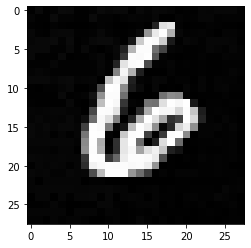

In [582]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')